In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, fbeta_score

In [ ]:
df=pd.read_csv('/content/Airline_Delay_Cause (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [ ]:
df.describe().T

count         mean           std     min      25%  \
year                 179338.0  2019.480082      2.410204  2015.0  2018.00   
month                179338.0     6.485725      3.463516     1.0     3.00   
arr_flights          178997.0   327.816969    931.001446     1.0    41.00   
arr_del15            178747.0    58.709086    164.378035     0.0     6.00   
carrier_ct           178997.0    18.572643     47.389651     0.0     1.96   
weather_ct           178997.0     2.035742      6.894812     0.0     0.00   
nas_ct               178997.0    17.094929     56.279604     0.0     1.00   
security_ct          178997.0     0.145307      0.702149     0.0     0.00   
late_aircraft_ct     178997.0    20.778477     64.912766     0.0     1.00   
arr_cancelled        178997.0     6.830103     41.446756     0.0     0.00   
arr_diverted         178997.0     0.779572      3.490499     0.0     0.00   
arr_delay            178997.0  3863.310676  11902.153241     0.0   288.00   
carrier_delay        178997.0  1325.546199   4067.786987     0.0    91.00   
weather_delay        178997.0   209.113426    791.817638     0.0     0.00   
nas_delay            178997.0   819.949284   3178.603458     0.0    28.00   
security_delay       178997.0     6.839941     40.440497     0.0     0.00   
late_aircraft_delay  178997.0  1501.854875   4878.178427     0.0    54.00   

                         50%      75%        max  
year                 2020.00  2022.00    2023.00  
month                   6.00     9.00      12.00  
arr_flights            89.00   218.00   21977.00  
arr_del15              15.00    40.00    4176.00  
carrier_ct              5.40    14.70    1293.91  
weather_ct              0.22     1.62     266.42  
nas_ct                  3.30     9.86    1884.42  
security_ct             0.00     0.00      58.69  
late_aircraft_ct        4.29    13.01    2069.07  
arr_cancelled           1.00     3.00    4951.00  
arr_diverted            0.00     1.00     160.00  
arr_delay             900.00  2547.00  438783.00  
carrier_delay         321.00   986.00  196944.00  
weather_delay          12.00   131.00   31960.00  
nas_delay             124.00   401.00  112018.00  
security_delay          0.00     0.00    3760.00  
late_aircraft_delay   286.00   964.00  227959.00

In [ ]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
cols_to_sum = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Sum the components
df['components_sum'] = df[cols_to_sum].sum(axis=1)

# Find rows where arr_del15 is not within ¬±1 of the components sum
mismatched_rows = df[
    (df['arr_del15'] >= df['components_sum'] + 1) |
    (df['arr_del15'] <= df['components_sum'] - 1)
]

# Show result
print("Number of mismatched rows:", len(mismatched_rows))
display(mismatched_rows.head())


Number of mismatched rows: 6


year  month carrier                 carrier_name airport  \
2476   2023     11      F9            Frontier Airlines     CLE   
5228   2023     10      UA     United Air Lines Network     DCA   
63628  2021      3      F9            Frontier Airlines     STL   
75724  2020      8      DL      Delta Air Lines Network     SEA   
92426  2019     12      ZW  Air Wisconsin Airlines Corp     AZO   

                                            airport_name  arr_flights  \
2476      Cleveland, OH: Cleveland-Hopkins International        492.0   
5228   Washington, DC: Ronald Reagan Washington National        538.0   
63628      St. Louis, MO: St Louis Lambert International         87.0   
75724          Seattle, WA: Seattle/Tacoma International       1842.0   
92426  Kalamazoo, MI: Kalamazoo/Battle Creek Internat...         84.0   

       arr_del15  carrier_ct  weather_ct  ...  late_aircraft_ct  \
2476        99.0       31.82        0.12  ...             32.24   
5228        56.0       22.02        0.74  ...             13.61   
63628       17.0        2.59        0.00  ...              4.87   
75724      127.0       52.19        6.54  ...             28.48   
92426       22.0        5.03        0.00  ...             10.16   

       arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
2476             0.0           0.0     6934.0         3313.0            7.0   
5228             1.0           1.0     3006.0          976.0           46.0   
63628            3.0           0.0      559.0           99.0            0.0   
75724            6.0           1.0     7690.0         4059.0          269.0   
92426            0.0           2.0     1591.0          301.0            0.0   

       nas_delay  security_delay  late_aircraft_delay  components_sum  
2476      1140.0             0.0               2420.0           97.99  
5228       546.0             0.0               1207.0           54.99  
63628      261.0             0.0                179.0           16.00  
75724     1203.0            21.0               1629.0          126.00  
92426      466.0             0.0                824.0           20.99  

[5 rows x 22 columns]

here i drop the columns with missing values because if i randomly fill the data then the relation between the columns doesnt hold true

And also there are very less columns with missing values

In [ ]:
numerical_columns = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
                     'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
                     'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
                     'security_delay', 'late_aircraft_delay']

df= df.dropna(subset=numerical_columns)

print(f"total columns After dropping missing: {len(df)}")


total columns After dropping missing: 178747


In [ ]:
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
components_sum         0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

<Axes: xlabel='arr_delay', ylabel='Density'>

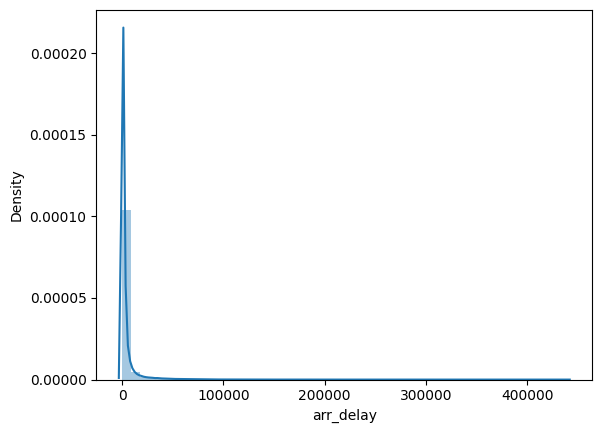

In [ ]:
sns.distplot(df['arr_delay'])

only some of the airlines got delayed out of total arrivals so i will make the new columns on the basis of the ratio w.r.t the arrival_flights

In [ ]:

df['delayed_ratio'] = (df['arr_del15'] / df['arr_flights'])
df['carrier_ratio'] = df['carrier_ct'] / df['arr_flights']
df['weather_ratio'] = df['weather_ct'] / df['arr_flights']
df['nas_ratio'] = df['nas_ct'] / df['arr_flights']
df['security_ratio'] = df['security_ct'] / df['arr_flights']
df['late_aircraft_ratio'] = df['late_aircraft_ct'] / df['arr_flights']

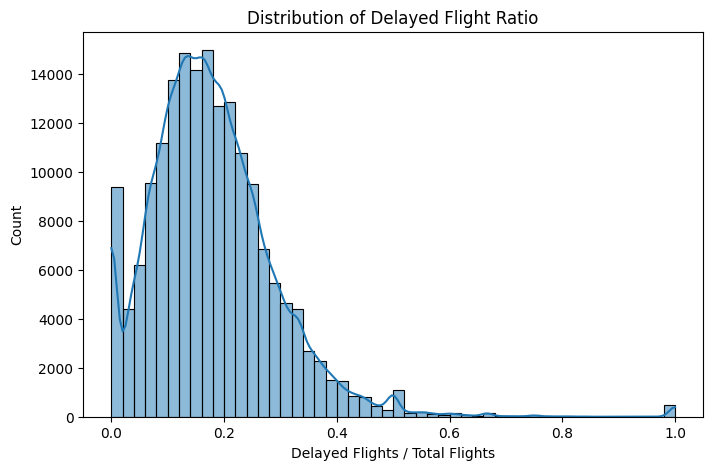

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['delayed_ratio'], bins=50, kde=True)
plt.title("Distribution of Delayed Flight Ratio")
plt.xlabel("Delayed Flights / Total Flights")
plt.show()

In [ ]:
df.describe().T

count                           mean  \
year                 178747.0                    2019.478604   
month                178747.0                       6.488411   
arr_flights          178747.0                     328.263244   
arr_del15            178747.0                      58.709086   
carrier_ct           178747.0                      18.598619   
weather_ct           178747.0                       2.038589   
nas_ct               178747.0                      17.118839   
security_ct          178747.0                       0.145511   
late_aircraft_ct     178747.0                      20.807539   
arr_cancelled        178747.0                       6.827555   
arr_diverted         178747.0                       0.780545   
arr_delay            178747.0                    3868.713998   
carrier_delay        178747.0                    1327.400141   
weather_delay        178747.0                     209.405898   
nas_delay            178747.0                     821.096086   
security_delay       178747.0                       6.849508   
late_aircraft_delay  178747.0                    1503.955406   
components_sum       178747.0                      58.709096   
date                   178747  2019-12-08 05:33:59.819409408   
delayed_ratio        178747.0                       0.180415   
carrier_ratio        178747.0                        0.06641   
weather_ratio        178747.0                       0.007914   
nas_ratio            178747.0                       0.047885   
security_ratio       178747.0                       0.000437   
late_aircraft_ratio  178747.0                       0.057771   

                                     min                  25%  \
year                              2015.0               2018.0   
month                                1.0                  3.0   
arr_flights                          1.0                 41.0   
arr_del15                            0.0                  6.0   
carrier_ct                           0.0                 1.97   
weather_ct                           0.0                  0.0   
nas_ct                               0.0                  1.0   
security_ct                          0.0                  0.0   
late_aircraft_ct                     0.0                  1.0   
arr_cancelled                        0.0                  0.0   
arr_diverted                         0.0                  0.0   
arr_delay                            0.0                290.0   
carrier_delay                        0.0                 91.0   
weather_delay                        0.0                  0.0   
nas_delay                            0.0                 28.0   
security_delay                       0.0                  0.0   
late_aircraft_delay                  0.0                 55.0   
components_sum                       0.0                 5.99   
date                 2015-01-01 00:00:00  2018-04-01 00:00:00   
delayed_ratio                        0.0             0.105263   
carrier_ratio                        0.0             0.032222   
weather_ratio                        0.0                  0.0   
nas_ratio                            0.0             0.013646   
security_ratio                       0.0                  0.0   
late_aircraft_ratio                  0.0             0.017964   

                                     50%                  75%  \
year                              2020.0               2022.0   
month                                6.0                 10.0   
arr_flights                         89.0                218.0   
arr_del15                           15.0                 40.0   
carrier_ct                          5.42                14.73   
weather_ct                          0.22                 1.63   
nas_ct                              3.31                 9.88   
security_ct                          0.0                  0.0   
late_aircraft_ct                     4.3                13.04   
arr_cancelled     

In [ ]:
# Step 1: Compute sum of components
cols_to_sum = ['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
df['components_sum'] = df[cols_to_sum].sum(axis=1)

# Step 2: Extract year
df['year'] = pd.to_datetime(df['date']).dt.year

# Step 3: Compute yearly average ratio
df['arr_ratio'] = df['arr_flights'] / df['components_sum']
yearly_avg_ratio = df[df['components_sum'] > 0].groupby('year')['arr_ratio'].mean()

# Step 4: Replace where arr_flights < components_sum
def fix_arr_flights(row):
    if row['arr_flights'] < row['components_sum']:
        ratio = yearly_avg_ratio.get(row['year'], 1.0)  # fallback to 1.0 if missing
        return ratio * row['components_sum']
    else:
        return row['arr_flights']

df['arr_flights'] = df.apply(fix_arr_flights, axis=1)

# Optional cleanup
df.drop(columns=['components_sum', 'arr_ratio'], inplace=True)


## Exploratory Data Analysis

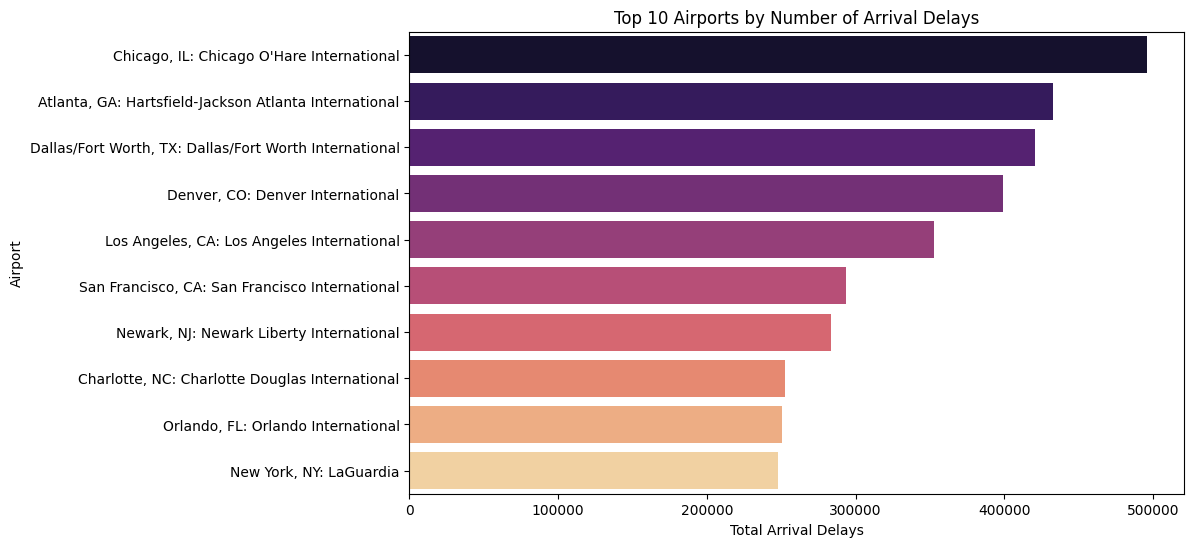

In [ ]:
top_airports = df.groupby('airport_name')['arr_del15'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='magma')
plt.title("Top 10 Airports by Number of Arrival Delays")
plt.xlabel("Total Arrival Delays")
plt.ylabel("Airport")
plt.show()


In [ ]:
top_airports = df.groupby('carrier_name')['arr_del15'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,3))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='magma')
plt.title("Top 5 Airports by Number of Arrival Delays")
plt.xlabel("Total Arrival Delays")
plt.ylabel("Airport")
plt.show()

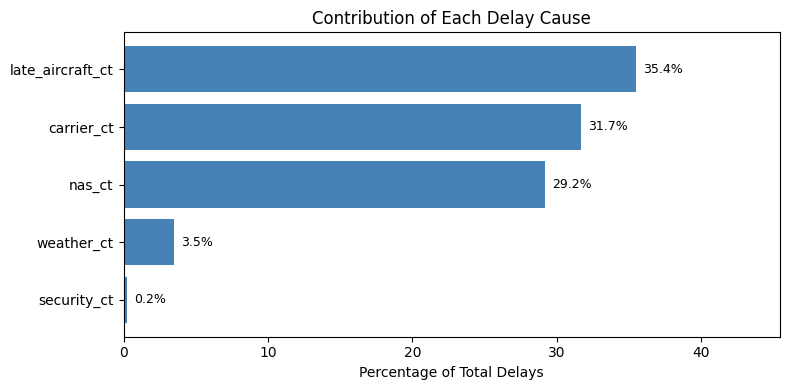

In [ ]:


cause_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
cause_totals = df[cause_cols].sum()
cause_pct = 100 * cause_totals / cause_totals.sum()

# Sort values for consistent bar order
cause_pct_sorted = cause_pct.sort_values()

plt.figure(figsize=(8, 4))
bars = plt.barh(cause_pct_sorted.index, cause_pct_sorted.values, color='steelblue')
plt.xlabel("Percentage of Total Delays")
plt.title("Contribution of Each Delay Cause")

# Add percentage labels to the right of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center', fontsize=9)

plt.xlim(0, max(cause_pct_sorted.values) + 10)  # Add margin for text
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'date', 'delayed_ratio',
       'carrier_ratio', 'weather_ratio', 'nas_ratio', 'security_ratio',
       'late_aircraft_ratio'],
      dtype='object')

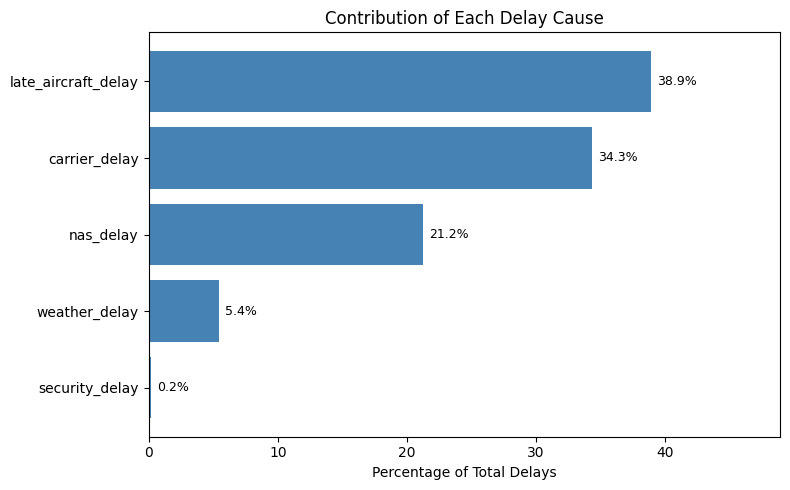

In [ ]:
cause_cols = ['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']
cause_totals = df[cause_cols].sum()
cause_pct = 100 * cause_totals / cause_totals.sum()

# Sort values for consistent bar order
cause_pct_sorted = cause_pct.sort_values()

plt.figure(figsize=(8, 5))
bars = plt.barh(cause_pct_sorted.index, cause_pct_sorted.values, color='steelblue')
plt.xlabel("Percentage of Total Delays")
plt.title("Contribution of Each Delay Cause")

# Add percentage labels to the right of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center', fontsize=9)

plt.xlim(0, max(cause_pct_sorted.values) + 10)  # Add margin for text
plt.tight_layout()
plt.show()


we can clearly see that there are 3 major factor of delay

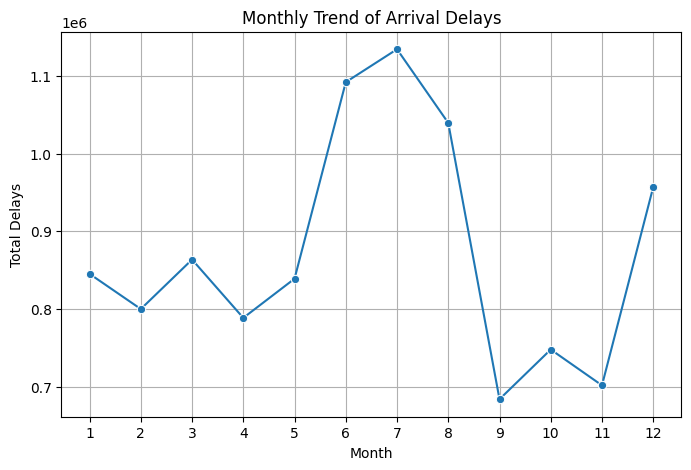

In [ ]:
df['month'] = pd.to_datetime(df['date']).dt.month
monthly_delays = df.groupby('month')['arr_del15'].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_delays.index, y=monthly_delays.values, marker='o')
plt.title("Monthly Trend of Arrival Delays")
plt.xlabel("Month")
plt.ylabel("Total Delays")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


mostly delay we see in middle months

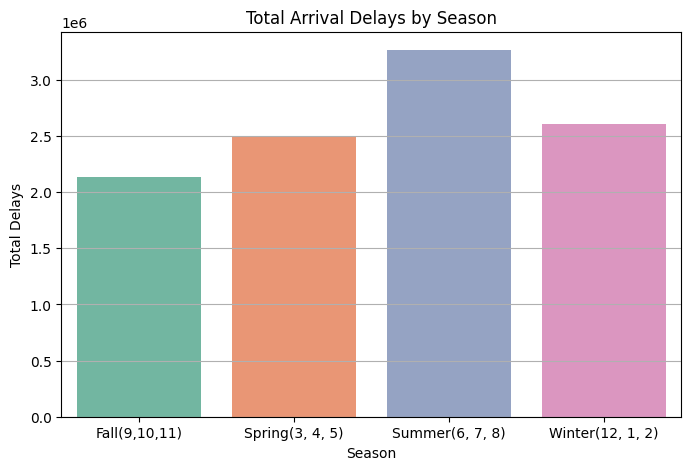

In [ ]:
#season wise delay
# Step 1: Define season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter(12, 1, 2)'
    elif month in [3, 4, 5]:
        return 'Spring(3, 4, 5)'
    elif month in [6, 7, 8]:
        return 'Summer(6, 7, 8)'
    else:
        return 'Fall(9,10,11)'

# Step 2: Apply season
df['season'] = df['month'].apply(get_season)

# Step 3: Group by season
seasonal_delays = df.groupby('season')['arr_del15'].sum()

# Step 4: Plot
plt.figure(figsize=(8,5))
sns.barplot(x=seasonal_delays.index, y=seasonal_delays.values, palette="Set2")
plt.title("Total Arrival Delays by Season")
plt.xlabel("Season")
plt.ylabel("Total Delays")
plt.grid(axis='y')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
corr = df[['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Delay Causes")
plt.show()


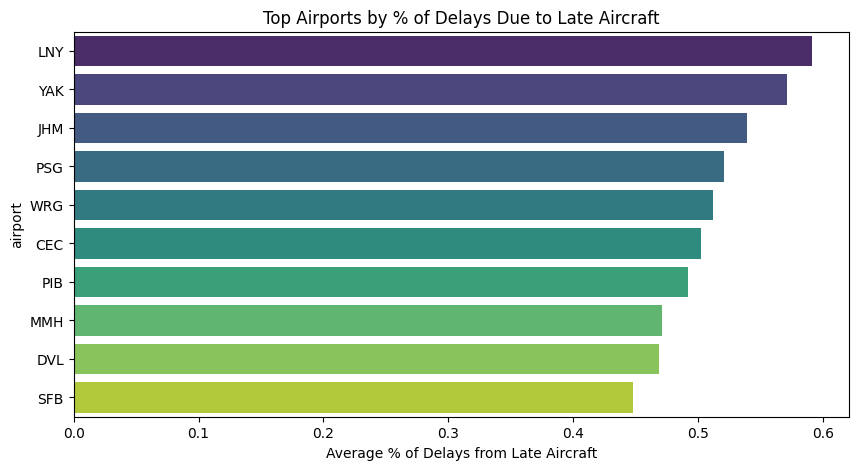

In [ ]:
df['late_aircraft_ratio'] = df['late_aircraft_ct'] / df['arr_del15'].replace(0, np.nan)
airport_ratio = df.groupby('airport')['late_aircraft_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=airport_ratio.values, y=airport_ratio.index, palette='viridis')
plt.title("Top Airports by % of Delays Due to Late Aircraft")
plt.xlabel("Average % of Delays from Late Aircraft")
plt.show()


<Figure size 1200x600 with 0 Axes>

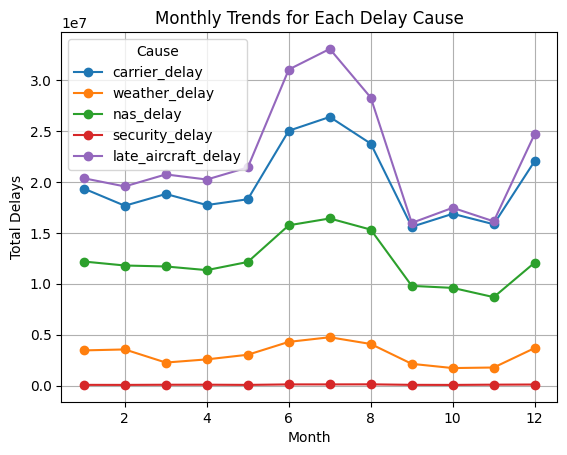

In [ ]:
monthly_cause = df.groupby('month')[cause_cols].sum()

plt.figure(figsize=(12,6))
monthly_cause.plot(kind='line', marker='o')
plt.title("Monthly Trends for Each Delay Cause")
plt.xlabel("Month")
plt.ylabel("Total Delays")
plt.grid(True)
plt.legend(title="Cause")
plt.show()


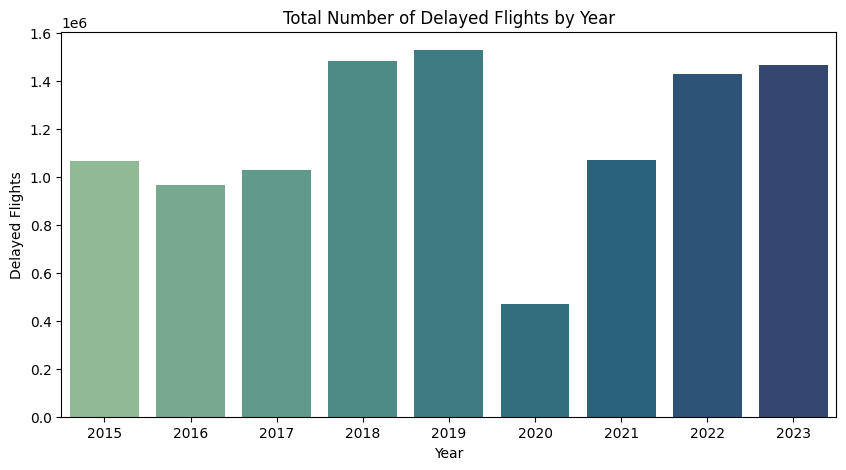

In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year
yearly_delays = df.groupby('year')['arr_del15'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=yearly_delays.index, y=yearly_delays.values, palette='crest')
plt.title("Total Number of Delayed Flights by Year")
plt.xlabel("Year")
plt.ylabel("Delayed Flights")
plt.show()


IN 2020 we see less delay may be because of  pandemic

In [ ]:
avg_delay_per_year = df.groupby('year')['arr_delay'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=avg_delay_per_year.index, y=avg_delay_per_year.values, marker='o', color='teal')
plt.title("Average Arrival Delay by Year")
plt.xlabel("Year")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.show()

In [ ]:
df['is_delayed'] = (df['delayed_ratio'] > 0).astype(int)


In [ ]:
df.describe().T

count                           mean  \
year                 178747.0                    2019.478604   
month                178747.0                       6.488411   
arr_flights          178747.0                     329.371108   
arr_del15            178747.0                      58.709086   
carrier_ct           178747.0                      18.598619   
weather_ct           178747.0                       2.038589   
nas_ct               178747.0                      17.118839   
security_ct          178747.0                       0.145511   
late_aircraft_ct     178747.0                      20.807539   
arr_cancelled        178747.0                       6.827555   
arr_diverted         178747.0                       0.780545   
arr_delay            178747.0                    3868.713998   
carrier_delay        178747.0                    1327.400141   
weather_delay        178747.0                     209.405898   
nas_delay            178747.0                     821.096086   
security_delay       178747.0                       6.849508   
late_aircraft_delay  178747.0                    1503.955406   
date                   178747  2019-12-08 05:33:59.819409408   
delayed_ratio        178747.0                       0.180415   
carrier_ratio        178747.0                        0.06641   
weather_ratio        178747.0                       0.007914   
nas_ratio            178747.0                       0.047885   
security_ratio       178747.0                       0.000437   
late_aircraft_ratio  170374.0                       0.305413   
is_delayed           178747.0                       0.953157   

                                     min                  25%  \
year                              2015.0               2018.0   
month                                1.0                  3.0   
arr_flights                          1.0                 42.0   
arr_del15                            0.0                  6.0   
carrier_ct                           0.0                 1.97   
weather_ct                           0.0                  0.0   
nas_ct                               0.0                  1.0   
security_ct                          0.0                  0.0   
late_aircraft_ct                     0.0                  1.0   
arr_cancelled                        0.0                  0.0   
arr_diverted                         0.0                  0.0   
arr_delay                            0.0                290.0   
carrier_delay                        0.0                 91.0   
weather_delay                        0.0                  0.0   
nas_delay                            0.0                 28.0   
security_delay                       0.0                  0.0   
late_aircraft_delay                  0.0                 55.0   
date                 2015-01-01 00:00:00  2018-04-01 00:00:00   
delayed_ratio                        0.0             0.105263   
carrier_ratio                        0.0             0.032222   
weather_ratio                        0.0                  0.0   
nas_ratio                            0.0             0.013646   
security_ratio                       0.0                  0.0   
late_aircraft_ratio                  0.0             0.175517   
is_delayed                           0.0                  1.0   

                                     50%                  75%  \
year                              2020.0               2022.0   
month                                6.0                 10.0   
arr_flights                         89.0                219.0   
arr_del15                           15.0                 40.0   
carrier_ct                          5.42                14.73   
weather_ct                          0.22                 1.63   
nas_ct                              3.31                 9.88   
security_ct                          0.0                  0.0   
late_aircraft_ct                     4.3                13.04   
arr_cancelled     

## Data Preprocessing

In [ ]:
# Drop unused columns
df = df.drop(columns=['carrier_name', 'airport_name'])

In [ ]:
df.columns

Index(['year', 'month', 'carrier', 'airport', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'date', 'delayed_ratio', 'carrier_ratio', 'weather_ratio', 'nas_ratio',
       'security_ratio', 'late_aircraft_ratio', 'season', 'is_delayed'],
      dtype='object')

In [ ]:
df['carrier'].unique()

array(['9E', 'AA', 'OH', 'OO', 'WN', 'AS', 'DL', 'PT', 'QX', 'UA', 'YV',
       'B6', 'F9', 'G4', 'G7', 'HA', 'MQ', 'YX', 'ZW', 'C5', 'NK', 'EM',
       'EV', 'AX', 'CP', 'KS', '9K', 'VX', 'US'], dtype=object)

In [ ]:
df['airport'].unique()

array(['ABE', 'AEX', 'AGS', 'ALB', 'ATL', 'ATW', 'AUS', 'AVL', 'AZO',
       'BDL', 'BGM', 'BGR', 'BHM', 'BMI', 'BNA', 'BOS', 'BTR', 'BTV',
       'BUF', 'BWI', 'CAE', 'CHA', 'CHO', 'CHS', 'CID', 'CLE', 'CLT',
       'CMH', 'CRW', 'CVG', 'CWA', 'DAY', 'DCA', 'DHN', 'DLH', 'DSM',
       'DTW', 'EWR', 'EYW', 'FAR', 'FAY', 'FLL', 'FSD', 'GFK', 'GNV',
       'GPT', 'GRB', 'GRR', 'GSO', 'GSP', 'GTR', 'HPN', 'HSV', 'IAD',
       'ICT', 'ILM', 'IND', 'ITH', 'JAN', 'JAX', 'JFK', 'LAN', 'LEX',
       'LFT', 'LGA', 'LIT', 'MCI', 'MDT', 'MEM', 'MGM', 'MIA', 'MKE',
       'MLI', 'MLU', 'MOB', 'MQT', 'MSN', 'MSP', 'MSY', 'MYR', 'OAJ',
       'OMA', 'ORD', 'ORF', 'ORH', 'PHL', 'PIT', 'PNS', 'PVD', 'PWM',
       'RDU', 'RIC', 'ROA', 'ROC', 'RST', 'RSW', 'SAV', 'SBN', 'SDF',
       'SGF', 'SHV', 'STL', 'SYR', 'TLH', 'TRI', 'TUL', 'TVC', 'TYS',
       'VLD', 'XNA', 'ABQ', 'AMA', 'ANC', 'AVP', 'BFL', 'BOI', 'BUR',
       'BZN', 'COS', 'DAB', 'DEN', 'DFW', 'ECP', 'MHT', 'MLB', 'OKC',
       'PHF', 'PIA',

In [ ]:
cls_features=[
    'year', 'month', 'carrier', 'airport',
    'arr_cancelled', 'arr_diverted', 'arr_flights'
]

reg_features = [
    'arr_cancelled', 'arr_diverted',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'year', 'month', 'carrier', 'airport', 'arr_flights'
]



In [ ]:
X = df[cls_features].copy()
y = df['is_delayed']

In [ ]:
le_carrier = LabelEncoder()
le_airport = LabelEncoder()
X['carrier'] = le_carrier.fit_transform(X['carrier'])
X['airport'] = le_airport.fit_transform(X['airport'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:

# Safety net before modeling
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # always use training stats


In [ ]:
# üìå STEP 5: Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##CLASSIFICATION MODELS

In [ ]:
# ‚úÖ Logistic Regression
# -------------------------------
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]

y_pred_custom = (y_probs > 0).astype(int)

print("üìä Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
from sklearn.metrics import accuracy_score

# For example, using logistic regression predictions:
accuracy = accuracy_score(y_test, y_pred_log)
accuracy_1 = accuracy_score(y_test, y_pred_custom)
print("‚úÖ Accuracy:", round(accuracy * 100, 2), "%")
print("‚úÖ Accuracy1:", round(accuracy_1 * 100, 2), "%")



üìä Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.21      0.95      0.34      1675
           1       1.00      0.82      0.90     34075

    accuracy                           0.83     35750
   macro avg       0.60      0.88      0.62     35750
weighted avg       0.96      0.83      0.87     35750

Confusion Matrix:
 [[ 1586    89]
 [ 6129 27946]]
‚úÖ Accuracy: 82.61 %
‚úÖ Accuracy1: 95.31 %


In [ ]:
# -------------------------------
# ‚úÖ Random Forest
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=150,           # Same number of trees as XGBoost
    max_depth=6,                # Limit tree depth like XGBoost
    max_samples=0.8,            # Equivalent to subsample in XGBoost
    max_features=0.8,           # Equivalent to colsample_bytree
    class_weight='balanced',    # To handle class imbalance
    random_state=42,
    n_jobs=-1                   # Use all processors for speed
)
rf.fit(X_train, y_train)  # No need to scale for RandomForest
y_pred_rf = rf.predict(X_test)

print("\nüìä Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
from sklearn.metrics import accuracy_score

# For example, using logistic regression predictions:
accuracy = accuracy_score(y_test, y_pred_log)
print("‚úÖ Accuracy:", round(accuracy * 100, 2), "%")



üìä Random Forest Report:

              precision    recall  f1-score   support

           0       0.33      0.90      0.48      1675
           1       0.99      0.91      0.95     34075

    accuracy                           0.91     35750
   macro avg       0.66      0.90      0.71     35750
weighted avg       0.96      0.91      0.93     35750

Confusion Matrix:
 [[ 1509   166]
 [ 3128 30947]]
‚úÖ Accuracy: 82.61 %


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize and train the model
xgb = XGBClassifier(n_estimators=150, max_depth=6, learning_rate=0.1,
                    subsample=0.8, colsample_bytree=0.8,
                    use_label_encoder=False, eval_metric='logloss',
                    random_state=42)

xgb.fit(X_train, y_train)

# 2. Predict on test data
y_pred_xgb = xgb.predict(X_test)

# 3. Evaluation
print("\nüìä XGBoost Classifier Report:\n")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# 4. Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("‚úÖ Accuracy:", round(accuracy * 100, 2), "%")



üìä XGBoost Classifier Report:

              precision    recall  f1-score   support

           0       0.75      0.50      0.60      1675
           1       0.98      0.99      0.98     34075

    accuracy                           0.97     35750
   macro avg       0.86      0.75      0.79     35750
weighted avg       0.97      0.97      0.97     35750

Confusion Matrix:
 [[  836   839]
 [  276 33799]]
‚úÖ Accuracy: 96.88 %


#XGboost gives better accuracy

In [ ]:
# Logistic Regression
unique_log, counts_log = np.unique(y_pred_log, return_counts=True)
print("üìä Prediction distribution (Logistic Regression):")
print(dict(zip(unique_log, counts_log)))

# Random Forest
unique_rf, counts_rf = np.unique(y_pred_rf, return_counts=True)
print("\nüå≤ Prediction distribution (Random Forest):")
print(dict(zip(unique_rf, counts_rf)))

# XGBoost
unique_xgb, counts_xgb = np.unique(y_pred_xgb, return_counts=True)
print("\nüöÄ Prediction distribution (XGBoost):")
print(dict(zip(unique_xgb, counts_xgb)))

üìä Prediction distribution (Logistic Regression):
{np.int64(0): np.int64(7715), np.int64(1): np.int64(28035)}

üå≤ Prediction distribution (Random Forest):
{np.int64(0): np.int64(4637), np.int64(1): np.int64(31113)}

üöÄ Prediction distribution (XGBoost):
{np.int64(0): np.int64(1112), np.int64(1): np.int64(34638)}


In [ ]:
# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

#REGRESSION MODELS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df['avg_delay_per_delayed_flight'] = np.where(
    df['arr_del15'] == 0,
    0,
    (df['arr_delay'] / df['arr_del15']).round(2)
)

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['avg_delay_per_delayed_flight'], bins=50, kde=True)
plt.title("Distribution of Delayed Flight Ratio")
plt.xlabel("Delayed Flights / Total Flights")
plt.show()

In [ ]:
df.describe().T

count                           mean  \
year                          178747.0                    2019.478604   
month                         178747.0                       6.488411   
arr_flights                   178747.0                     329.371108   
arr_del15                     178747.0                      58.709086   
carrier_ct                    178747.0                      18.598619   
weather_ct                    178747.0                       2.038589   
nas_ct                        178747.0                      17.118839   
security_ct                   178747.0                       0.145511   
late_aircraft_ct              178747.0                      20.807539   
arr_cancelled                 178747.0                       6.827555   
arr_diverted                  178747.0                       0.780545   
arr_delay                     178747.0                    3868.713998   
carrier_delay                 178747.0                    1327.400141   
weather_delay                 178747.0                     209.405898   
nas_delay                     178747.0                     821.096086   
security_delay                178747.0                       6.849508   
late_aircraft_delay           178747.0                    1503.955406   
date                            178747  2019-12-08 05:33:59.819409408   
delayed_ratio                 178747.0                       0.180415   
carrier_ratio                 178747.0                        0.06641   
weather_ratio                 178747.0                       0.007914   
nas_ratio                     178747.0                       0.047885   
security_ratio                178747.0                       0.000437   
late_aircraft_ratio           170374.0                       0.305413   
is_delayed                    178747.0                       0.953157   
avg_delay_per_delayed_flight  178747.0                       60.28411   

                                              min                  25%  \
year                                       2015.0               2018.0   
month                                         1.0                  3.0   
arr_flights                                   1.0                 42.0   
arr_del15                                     0.0                  6.0   
carrier_ct                                    0.0                 1.97   
weather_ct                                    0.0                  0.0   
nas_ct                                        0.0                  1.0   
security_ct                                   0.0                  0.0   
late_aircraft_ct                              0.0                  1.0   
arr_cancelled                                 0.0                  0.0   
arr_diverted                                  0.0                  0.0   
arr_delay                                     0.0                290.0   
carrier_delay                                 0.0                 91.0   
weather_delay                                 0.0                  0.0   
nas_delay                                     0.0                 28.0   
security_delay                                0.0                  0.0   
late_aircraft_delay                           0.0                 55.0   
date                          2015-01-01 00:00:00  2018-04-01 00:00:00   
delayed_ratio                                 0.0             0.105263   
carrier_ratio                                 0.0             0.032222   
weather_ratio                                 0.0                  0.0   
nas_ratio                                     0.0             0.013646   
security_ratio                                0.0                  0.0   
late_aircraft_ratio                           0.0             0.175517   
is_delayed                                    0.0                  1.0   
avg_delay_per_delayed_flight                  0.0                42.38   

                                              50%             

In [ ]:
percentile_99 = df['avg_delay_per_delayed_flight'].quantile(0.99)
print("99th Percentile:", percentile_99)



99th Percentile: 190.3840000000008


here data is skewed so i clip the data higher than the 99 percentile value

In [ ]:
df['avg_delay_per_delayed_flight'] = df['avg_delay_per_delayed_flight'].clip(upper=df['avg_delay_per_delayed_flight'].quantile(0.99))


In [ ]:

# üéØ Define regression features and target
reg_features = [
    'arr_cancelled', 'arr_diverted',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'year', 'month', 'carrier', 'airport', 'arr_flights'
]
target = 'avg_delay_per_delayed_flight'

In [ ]:
# üßπ Filter and encode df
df_reg = df[reg_features + [target]].copy()


In [ ]:
# üî† Label encode 'carrier' and 'airport'
le_carrier = LabelEncoder()
le_airport = LabelEncoder()
df_reg['carrier'] = le_carrier.fit_transform(df['carrier'])
df_reg['airport'] = le_airport.fit_transform(df['airport'])

In [ ]:
# üì¶ Split into train and test
X = df_reg[reg_features]
y = df_reg[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# üìä Evaluation function
def report_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\nüìâ {name}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R¬≤  : {r2:.3f}")

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_test_orig = y_test

In [ ]:
# ‚úÖ Display results
report_metrics("Linear Regression", y_test_orig, y_pred_lr)


üìâ Linear Regression
MAE : 21.12
RMSE: 30.22
R¬≤  : 0.016


In [ ]:
# ‚úÖ 1. Train the Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=150,       # number of trees
    max_depth=10,           # control overfitting
    min_samples_split=4,    # control overfitting
    random_state=42
)
rf.fit(X_train, y_train)

# ‚úÖ 2. Predict
y_pred_rf = rf.predict(X_test)

# ‚úÖ 3. Evaluation
print("\nüå≤ Random Forest Regression Results")
print("MAE :", round(mean_absolute_error(y_test, y_pred_rf), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 2))
print("R¬≤  :", round(r2_score(y_test, y_pred_rf), 3))


üå≤ Random Forest Regression Results
MAE : 16.58
RMSE: 25.06
R¬≤  : 0.323


In [ ]:
from xgboost import XGBRegressor

# üå≤ Define XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# üèãÔ∏è Train
xgb_model.fit(X_train, y_train)

# üìà Predict
y_pred_xgb = xgb_model.predict(X_test)

# üìä Evaluation
print("\nüöÄ XGBoost Regressor Results")
print("MAE :", round(mean_absolute_error(y_test, y_pred_xgb), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_xgb)), 2))
print("R¬≤  :", round(r2_score(y_test, y_pred_xgb), 3))


üöÄ XGBoost Regressor Results
MAE : 15.76
RMSE: 24.12
R¬≤  : 0.373


##XGBoost gives better results

In [ ]:
# Evaluate metrics
results = []

# Linear Regression
results.append({
    "Model": "Linear Regression",
    "MAE": round(mean_absolute_error(y_test, y_pred_lr), 2),
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 2),
    "R¬≤": round(r2_score(y_test, y_pred_lr), 3)
})

# Random Forest
results.append({
    "Model": "Random Forest",
    "MAE": round(mean_absolute_error(y_test, y_pred_rf), 2),
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 2),
    "R¬≤": round(r2_score(y_test, y_pred_rf), 3)
})

# XGBoost
results.append({
    "Model": "XGBoost",
    "MAE": round(mean_absolute_error(y_test, y_pred_xgb), 2),
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred_xgb)), 2),
    "R¬≤": round(r2_score(y_test, y_pred_xgb), 3)
})

# Display results
print("üìä Model Comparison Table\n")
print(f"{'Model':<20} {'MAE':<10} {'RMSE':<10} {'R¬≤':<10}")
print("-" * 50)
for row in results:
    print(f"{row['Model']:<20} {row['MAE']:<10} {row['RMSE']:<10} {row['R¬≤']:<10}")

üìä Model Comparison Table

Model                MAE        RMSE       R¬≤        
--------------------------------------------------
Linear Regression    21.12      30.22      0.016     
Random Forest        16.58      25.06      0.323     
XGBoost              15.76      24.12      0.373     


###SHAP

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns

# Actionability mapping (can be improved with domain expert input)
actionability_scores = {
    'carrier_ct': 0.9,
    'weather_ct': 0.1,
    'nas_ct': 0.5,
    'security_ct': 0.3,
    'late_aircraft_ct': 0.4,
    'arr_flights': 0.7,
    'arr_cancelled': 0.6,
    'arr_diverted': 0.4,
    'month': 0.6,
    'year': 0.2,
    'carrier': 0.5,
    'airport': 0.3
}

# Compute OAI = importance √ó actionability
oai = []
for i, f in enumerate(feature_names):
    a_score = actionability_scores.get(f, 0)
    oai.append((f, importances[i], a_score, importances[i] * a_score))

# Create and display DataFrame
oai_df = pd.DataFrame(oai, columns=['Feature', 'Importance', 'Actionability', 'OAI'])
oai_df = oai_df.sort_values(by='OAI', ascending=False)
print("üìä Operational Adjustability Index (OAI):")
print(oai_df)


üìä Operational Adjustability Index (OAI):
             Feature  Importance  Actionability       OAI
2         carrier_ct    0.380161            0.9  0.342145
6   late_aircraft_ct    0.173542            0.4  0.069417
4             nas_ct    0.109808            0.5  0.054904
9            carrier    0.097694            0.5  0.048847
11       arr_flights    0.054179            0.7  0.037925
3         weather_ct    0.103684            0.1  0.010368
0      arr_cancelled    0.015487            0.6  0.009292
8              month    0.012920            0.6  0.007752
10           airport    0.022681            0.3  0.006804
7               year    0.023242            0.2  0.004648
1       arr_diverted    0.005212            0.4  0.002085
5        security_ct    0.001391            0.3  0.000417


In [ ]:
!pip install shap

import shap

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_carrier = LabelEncoder()
le_airport = LabelEncoder()
df['carrier_encoded'] = le_carrier.fit_transform(df['carrier'])
df['airport_encoded'] = le_airport.fit_transform(df['airport'])

In [ ]:
df_delayed = df[df['arr_delay'] > 0].copy()

In [ ]:
max_delay_minutes = 1440
df_delayed['arr_delay'] = df_delayed['arr_delay'].clip(upper=max_delay_minutes)
print(f"Handled outliers by clipping delays at {max_delay_minutes} minutes.")


Handled outliers by clipping delays at 1440 minutes.


In [ ]:
print("Implementing Operational Adjustability Index (OAI) via sample weights...")
controllable_weight = 2.0  # Give more weight to controllable delays
external_weight = 1.0    # Normal weight for external delays

Implementing Operational Adjustability Index (OAI) via sample weights...


In [ ]:
total_controllable_delay = df_delayed['carrier_delay'] + df_delayed['late_aircraft_delay']
prop_controllable = (total_controllable_delay / df_delayed['arr_delay']).fillna(0)
# Assign a weight to each sample based on the OAI
sample_weights = (prop_controllable * controllable_weight +
                          (1 - prop_controllable) * external_weight)

print("Sample weights calculated to prioritize controllable delays.")

Sample weights calculated to prioritize controllable delays.


In [ ]:
features = ['year', 'month', 'carrier_encoded', 'airport_encoded', 'arr_flights']

In [ ]:
X_reg = df_delayed[features]
y_reg = df_delayed['arr_delay']

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r, sample_weights_train, sample_weights_test = train_test_split(
    X_reg, y_reg, sample_weights, test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb

# Train with sample weights to prioritize controllable delays
regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
regressor.fit(X_train_r, y_train_r, sample_weight=sample_weights_train)

# Predict
y_pred_r = regressor.predict(X_test_r)


In [ ]:

# Initialize SHAP TreeExplainer
explainer = shap.Explainer(regressor)

# Compute SHAP values for test data
shap_values = explainer(X_test_r)

# Summary plot: average impact on model output
shap.summary_plot(shap_values, X_test_r, plot_type="bar")